In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import os

# Parameters
n_days_to_predict = 15  # Number of days to predict ahead
training_period = 10  # Number of days to use as input for LSTM
path = "AAPL.csv"  # Path to your stock data file

# Load and preprocess the dataset
headers = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
df = pd.read_csv(path, names=headers, skiprows=1)  # Skip the header
df.replace("null", np.nan, inplace=True)
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(float)
df.set_index("Date", inplace=True)

# Filter the 'Close' column (target variable)
data = df.filter(['Close'])
dataset = data.values

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data using historical data
x_train, y_train = [], []

# Use the last `training_period` days to predict the next day
for i in range(training_period, len(scaled_data)):
    x_train.append(scaled_data[i - training_period:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert the lists into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the input to be [samples, time steps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Step 1: Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # LSTM layer
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dense(units=25))  # Dense layer to reduce complexity
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5


/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2584/2584 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - loss: 0.0030
Epoch 2/5
2584/2584 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - loss: 7.7073e-04
Epoch 3/5
2584/2584 ━━━━━━━━━━━━━━━━━━━━ 45s 17ms/step - loss: 4.6738e-04
Epoch 4/5
2584/2584 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 5.0862e-04
Epoch 5/5
2584/2584 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 3.1932e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
(1, 1, 1)
(1, 9, 1)
(1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/s

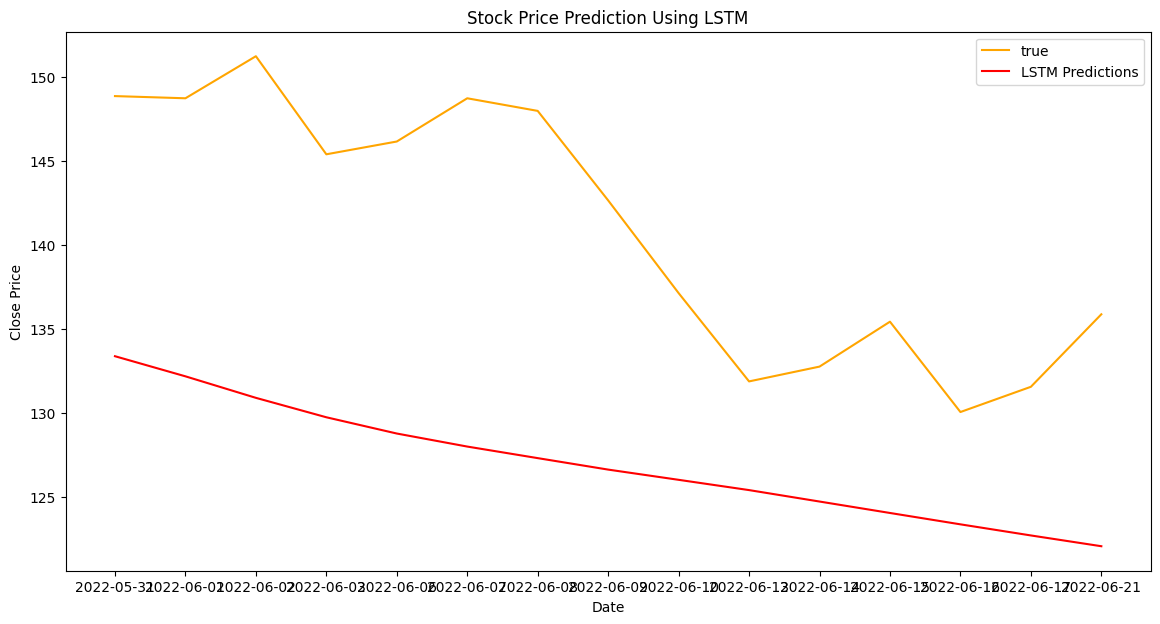

In [25]:

# Step 2: Make predictions on the training data and the test data
# Predict the next `n_days_to_predict` future stock prices using LSTM

# Create the test data for predictions (use the last `training_period` days for prediction)
x_test = scaled_data[-training_period:].reshape(1, -1, 1)

predictions = []

for i in range(n_days_to_predict):
    # Predict the next value using LSTM
    lstm_pred = model.predict(x_test)
    lstm_pred_rescaled = scaler.inverse_transform(lstm_pred)

    # Append the prediction to the list
    predictions.append(lstm_pred_rescaled[0, 0])

    # Update the test data (shift it by adding the latest prediction)
    print(lstm_pred.reshape(1,1,1).shape)
    print(x_test[:, 1:, :].shape)
    print(np.append(x_test[:, 1:, :], lstm_pred.reshape(1,1,1), axis=1).shape)
    # x_test = np.append(x_test[:, 1:, :], [[lstm_pred]], axis=1)
    x_test = np.append(x_test[:, 1:, :], lstm_pred.reshape(1,1,1), axis=1)

# Step 3: Visualize the predictions
plt.figure(figsize=(14, 7))
# Step 2: Create test data (last 10 days)
test_data = scaled_data[-(training_period + n_days_to_predict):]  # Get the last n_days_to_predict plus the training period
x_test = test_data[:-n_days_to_predict]  # Input data for prediction
y_test = test_data[-n_days_to_predict:]  # Actual values for comparison

y_test_rescaled = scaler.inverse_transform(y_test)
plt.plot(data.index[-len(predictions):], y_test_rescaled, label='true', color='orange')
plt.plot(data.index[-len(predictions):], predictions, label='LSTM Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction Using LSTM')
plt.legend()
plt.show()
